In [1]:
import pandas as pd
import numpy as np
#import glob
#import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from wordcloud import WordCloud

# Working on Tweets Dataset

In [2]:
#all_tweets = glob.glob("/home/hammad/Workdir/FYP/Dataset/Tweets/*.csv")

In [3]:
#tweets_dataset = pd.concat((pd.read_csv(f) for f in all_tweets))
#tweets_dataset= pd.read_csv('/home/hammad/Dropbox/University of Hertfordshire/FYP Project/Dataset/elonmusk_tweets.csv', parse_dates=["created_at"])
tweets_dataset= pd.read_csv('C:/Users/malik/Dropbox/University of Hertfordshire/FYP Project/Dataset/elonmusk_tweets.csv', parse_dates=["created_at"])

In [4]:
tweets_dataset.head()

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


In [5]:
tweets_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          2819 non-null   int64         
 1   created_at  2819 non-null   datetime64[ns]
 2   text        2819 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 66.2+ KB


In [6]:
#tweets_data = tweets_dataset[['date','tweet']]
tweets_data = tweets_dataset[['created_at','text']] # drop the id column

In [7]:
tweets_data.head()

,created_at,text
0,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


In [8]:
#tweets_data['datetime'] = pd.to_datetime(tweets_data['created_at'])

In [9]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  2819 non-null   datetime64[ns]
 1   text        2819 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 44.2+ KB


In [10]:
df =  tweets_data # copying dataframe into df 

In [11]:
df['Index'] = df.index # creating new index column and copying all index values into that column

In [12]:
df = tweets_data.set_index('created_at') # setting datetime column as index

In [13]:
df

,text,Index
created_at,,
2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...,0
2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",1
2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",2
2017-04-03 16:30:19,b'Stormy weather in Shortville ...',3
2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ...",4
...,...,...
2011-12-03 08:22:07,b'That was a total non sequitur btw',2814
2011-12-03 08:20:28,"b'Great Voltaire quote, arguably better than T...",2815
2011-12-01 10:29:04,b'I made the volume on the Model S http://t.co...,2816


In [14]:
df1 = df.between_time('16:00', '00:00') # separating all the tweets which are post after 4PM
df1

,text,Index
created_at,,
2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",1
2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",2
2017-04-03 16:30:19,b'Stormy weather in Shortville ...',3
2017-04-01 18:44:01,"b""Why did we waste so much time developing sil...",8
2017-04-01 18:39:09,b'Technology breakthrough: turns out chemtrail...,9
...,...,...
2011-12-27 19:54:15,b'RT @TheOnion: Vending Machine Attendant Admi...,2793
2011-12-26 16:29:50,b'Walked around a neighborhood recently rebuil...,2794
2011-12-26 16:23:04,"b""It was Xmas, so we brought presents for the ...",2795


In [15]:
#df2=tweets_data.between_time('00:01', '09:00')
#df2

In [16]:
#df = pd.concat([df1, df2])

In [17]:
#df['created_at']=df.index # copying all the index values in to new column named created_at
df1['created_at']=df1.index # copying all the index values in to new column named created_at
#df=df.set_index('Index') # Setting Index column as index
df1=df1.set_index('Index') # Setting Index column as index

C:\Users\malik\AppData\Local\Temp/ipykernel_13576/1839977241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['created_at']=df1.index # copying all the index values in to new column named created_at


In [18]:
#df = df[['created_at', 'text']] # changing the column position
#df

In [19]:
df1 = df1[['created_at', 'text']] # changing the column position
df1

,created_at,text
Index,,
1,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
8,2017-04-01 18:44:01,"b""Why did we waste so much time developing sil..."
9,2017-04-01 18:39:09,b'Technology breakthrough: turns out chemtrail...
...,...,...
2793,2011-12-27 19:54:15,b'RT @TheOnion: Vending Machine Attendant Admi...
2794,2011-12-26 16:29:50,b'Walked around a neighborhood recently rebuil...
2795,2011-12-26 16:23:04,"b""It was Xmas, so we brought presents for the ..."


In [20]:
df2 = df1['created_at'] + timedelta(days=1) - timedelta(hours=9) # changing date to next day and shifting hours back to 4PM

In [21]:
df2

Index
1      2017-04-04 11:01:01
2      2017-04-04 07:59:35
3      2017-04-04 07:30:19
8      2017-04-02 09:44:01
9      2017-04-02 09:39:09
               ...        
2793   2011-12-28 10:54:15
2794   2011-12-27 07:29:50
2795   2011-12-27 07:23:04
2806   2011-12-22 14:17:11
2818   2010-06-05 09:31:57
Name: created_at, Length: 1381, dtype: datetime64[ns]

In [22]:
tweets_data.update(df2) #update the df2 values into original dataset

In [23]:
#tweets_data["created_at"].min() , tweets_data["created_at"].max()

In [24]:
#tweets_data["created_at"].max()-tweets_data["created_at"].min()

In [25]:
#days = tweets_data['created_at'].dt.day_name()

In [26]:
#days_index = tweets_data['created_at'].dt.dayofweek
#tweets_data['days_name'] = days
#tweets_data['dayofWeek_index'] = days_index
#

In [27]:
#tweets_data.head()

In [28]:
#Sunday = tweets_data['created_at'].dt.dayofweek == 2





#result = tweets_data['created_at'].dt.dayofweek
#df10 =tweets_data[tweets_data.dt.dayofweek == 6] 
#tweets_data[tweets_data.index.dayofweek == 6]
#df10

In [29]:
saturday = pd.DataFrame() # created empty dataframe
sunday = pd.DataFrame() # created empty dataframe
saturday = tweets_data.loc[(tweets_data['created_at'].dt.dayofweek==5)] # separated all the saturday tweets
sunday = tweets_data.loc[(tweets_data['created_at'].dt.dayofweek==6)] # separated all the sunday tweets
#temp_df = tweets_data['created_at']

In [30]:
saturday

,created_at,text,Index
12,2017-04-01 04:55:23,"b'@adamsbj Def P100D with Ludicrous+, although...",12
13,2017-04-01 14:47:32,b'@BadAstronomer We can def bring it back like...,13
14,2017-04-01 10:18:42,b'@tesla_addict @TeslaMotors Working on it',14
15,2017-04-01 09:54:18,"b""@jasonlamb Looks like it could do 20% more w...",15
16,2017-04-01 09:52:51,b'@cheron A lot',16
...,...,...,...
2801,2011-12-24 01:33:35,b'We had a long and interesting conversation o...,2801
2802,2011-12-24 01:29:19,b'Kanye stopped by the SpaceX rocket factory t...,2802
2814,2011-12-03 08:22:07,b'That was a total non sequitur btw',2814
2815,2011-12-03 08:20:28,"b'Great Voltaire quote, arguably better than T...",2815


In [31]:
#saturday=tweets_data[tweets_data.days_name=='Saturday']
#sunday=tweets_data[tweets_data.days_name=='Sunday']


In [32]:
sunday

,created_at,text,Index
4,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ...",4
5,2017-04-02 06:04:07,"b""@Lexxxzis It's just a helicopter in helicopt...",5
6,2017-04-02 06:02:38,"b""@verge It won't matter""",6
7,2017-04-02 04:57:31,b'@SuperCoolCube Pretty good',7
8,2017-04-02 09:44:01,"b""Why did we waste so much time developing sil...",8
...,...,...,...
2754,2012-01-15 11:29:34,b'Somebody needs to tell Kim Jong-un that the ...,2754
2755,2012-01-15 11:27:41,"b'Once more, with feeling! ""North Korea Punis...",2755
2774,2012-01-01 13:08:42,"b""World violence being super low is probably c...",2774
2775,2012-01-01 13:05:47,"b""Here's a happy thought for 2012: world viole...",2775


In [33]:
#sunday = sunday.drop(['days_name', 'dayofWeek_index'], axis=1)
#saturday = saturday.drop(['days_name', 'dayofWeek_index'], axis=1)

In [34]:

#from dateutil.parser import parse



In [35]:
newsundaydates = sunday['created_at'] + timedelta(days=1) # change the sunday date to monday
newsaturdaydates = saturday['created_at'] + timedelta(days=2) # change the saturday date to monday

In [36]:
sunday['created_at'] = newsundaydates.values # updated the sunday new dates to dataframe 
saturday['created_at'] = newsaturdaydates.values # updated the saturday dates to dataframe

C:\Users\malik\AppData\Local\Temp/ipykernel_13576/3256950631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunday['created_at'] = newsundaydates.values # updated the sunday new dates to dataframe
C:\Users\malik\AppData\Local\Temp/ipykernel_13576/3256950631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saturday['created_at'] = newsaturdaydates.values # updated the saturday dates to dataframe


In [37]:
saturday

,created_at,text,Index
12,2017-04-03 04:55:23,"b'@adamsbj Def P100D with Ludicrous+, although...",12
13,2017-04-03 14:47:32,b'@BadAstronomer We can def bring it back like...,13
14,2017-04-03 10:18:42,b'@tesla_addict @TeslaMotors Working on it',14
15,2017-04-03 09:54:18,"b""@jasonlamb Looks like it could do 20% more w...",15
16,2017-04-03 09:52:51,b'@cheron A lot',16
...,...,...,...
2801,2011-12-26 01:33:35,b'We had a long and interesting conversation o...,2801
2802,2011-12-26 01:29:19,b'Kanye stopped by the SpaceX rocket factory t...,2802
2814,2011-12-05 08:22:07,b'That was a total non sequitur btw',2814
2815,2011-12-05 08:20:28,"b'Great Voltaire quote, arguably better than T...",2815


In [38]:
sunday

,created_at,text,Index
4,2017-04-03 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ...",4
5,2017-04-03 06:04:07,"b""@Lexxxzis It's just a helicopter in helicopt...",5
6,2017-04-03 06:02:38,"b""@verge It won't matter""",6
7,2017-04-03 04:57:31,b'@SuperCoolCube Pretty good',7
8,2017-04-03 09:44:01,"b""Why did we waste so much time developing sil...",8
...,...,...,...
2754,2012-01-16 11:29:34,b'Somebody needs to tell Kim Jong-un that the ...,2754
2755,2012-01-16 11:27:41,"b'Once more, with feeling! ""North Korea Punis...",2755
2774,2012-01-02 13:08:42,"b""World violence being super low is probably c...",2774
2775,2012-01-02 13:05:47,"b""Here's a happy thought for 2012: world viole...",2775


In [39]:
#tweets_data = tweets_data.drop(['days_name', 'dayofWeek_index'], axis=1)

In [40]:
#tweets = pd.concat()

In [41]:
tweets_data.update(newsundaydates) # updated the dataframe with new values
tweets_data.update(newsaturdaydates)
#tweets_data['created_at'] = newsundaydates.values
#tweets_data['created_at'] = newsaturdaydates.values

In [42]:
tweets_data # updated dataframe with no saturday and sunday dates

,created_at,text,Index
0,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...,0
1,2017-04-04 11:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",1
2,2017-04-04 07:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",2
3,2017-04-04 07:30:19,b'Stormy weather in Shortville ...',3
4,2017-04-03 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ...",4
...,...,...,...
2814,2011-12-05 08:22:07,b'That was a total non sequitur btw',2814
2815,2011-12-05 08:20:28,"b'Great Voltaire quote, arguably better than T...",2815
2816,2011-12-01 10:29:04,b'I made the volume on the Model S http://t.co...,2816
2817,2011-12-01 09:55:11,"b""Went to Iceland on Sat to ride bumper cars o...",2817


In [43]:
tweets_data = tweets_data[['created_at','text']]# droping index column

In [44]:
tweets_data # clean dataset with no tweets on saturday, sunday and after 4PM

,created_at,text
0,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,2017-04-04 11:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,2017-04-04 07:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,2017-04-04 07:30:19,b'Stormy weather in Shortville ...'
4,2017-04-03 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."
...,...,...
2814,2011-12-05 08:22:07,b'That was a total non sequitur btw'
2815,2011-12-05 08:20:28,"b'Great Voltaire quote, arguably better than T..."
2816,2011-12-01 10:29:04,b'I made the volume on the Model S http://t.co...
2817,2011-12-01 09:55:11,"b""Went to Iceland on Sat to ride bumper cars o..."


In [45]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\malik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\malik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\malik\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [46]:
#print(stopwords.words('english'))
#print(len(stopwords.words('english')))
StopWords = stopwords.words('english')

removewords = ['but','because','until','during','before','after','more','most','no','not','nor', 'only','own','same',
         'very','can','wil','just',"don't",'should','now', "couldn't","didn't", "doesn't","hadn't", 'won']
for words in removewords:
    if words in StopWords:
        StopWords.remove(words)

StopWords.extend(['due', 'et','sat','http', 'https', 'com', '@[\w]+','b', 'none', 'non', 'jujqwfcv', 'basically'
                  'btw', 'altmossberg', 'aveleebbc', 'ims', 'co','dtype','hea','tu', 'v', 'wmcnt'])       
#print('#########################################')
#print(StopWords)
#print(len(StopWords))


In [47]:
# This function will remove the unnecessary symbols, stopwords, and stem the words to tokens.
def clean_string(review):
    review = re.sub('@[a-zA-Z]', ' ', review) # remove hastags with @
    review = re.sub('#[a-zA-Z]', ' ', review) # remove hastags with #
    review = re.sub('[^a-zA-Z]', ' ', review) # remove every thing except alphabets 
    review = review.lower() # lower case all the tweets
    review = review.split()
    #ps = PorterStemmer()
    wnl = nltk.WordNetLemmatizer()
    review = [wnl.lemmatize(word) for word in review if not word in set(StopWords)]
    review = ' '.join(review)
    return review

In [48]:
corpus = tweets_data['text'].apply(clean_string) # applying the cleaning function

In [49]:
print(corpus)
type(corpus)
string = str(corpus)

0                                   robot spared humanity
1       orin efcon exactly tesla absurdly overvalued b...
2                                              efcon walt
3                               stormy weather shortville
4         erge coal dying nat gas fracking basically dead
                              ...                        
2814                                   total sequitur btw
2815    great voltaire quote arguably better twain hea...
2816    made volume model go now just need work miniat...
2817    went iceland ride bumper car ice no not countr...
2818    please ignore prior tweet someone pretending a...
Name: text, Length: 2819, dtype: object


In [50]:
tweets_data.update(corpus)


C:\Users\malik\anaconda3\lib\site-packages\pandas\core\frame.py:7511: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [51]:
tweets_data

,created_at,text
0,2017-04-05 14:56:29,robot spared humanity
1,2017-04-04 11:01:01,orin efcon exactly tesla absurdly overvalued b...
2,2017-04-04 07:59:35,efcon walt
3,2017-04-04 07:30:19,stormy weather shortville
4,2017-04-03 06:05:23,erge coal dying nat gas fracking basically dead
...,...,...
2814,2011-12-05 08:22:07,total sequitur btw
2815,2011-12-05 08:20:28,great voltaire quote arguably better twain hea...
2816,2011-12-01 10:29:04,made volume model go now just need work miniat...
2817,2011-12-01 09:55:11,went iceland ride bumper car ice no not countr...


In [52]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(string)

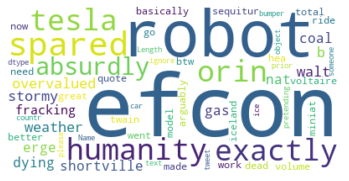

In [53]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

In [54]:
#days = tweets_data['created_at'].dt.day_name()
#days_index = tweets_data['created_at'].dt.dayofweek
#tweets_data['days_name'] = days
#tweets_data['dayofWeek_index'] = days_index


# Working on Stock Dataset

In [79]:
#stock_dataset = pd.read_csv('/home/hammad/Dropbox/University of Hertfordshire/FYP Project/Dataset/TSLA.csv')
stock_dataset = pd.read_csv('C:/Users/malik/Dropbox/University of Hertfordshire/FYP Project/Dataset/TSLA1.csv', parse_dates=["Date"])

In [80]:
stock_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500


In [81]:
stock_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1703 non-null   datetime64[ns]
 1   Open       1703 non-null   float64       
 2   High       1703 non-null   float64       
 3   Low        1703 non-null   float64       
 4   Close      1703 non-null   float64       
 5   Adj Close  1703 non-null   float64       
 6   Volume     1703 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 93.3 KB


In [58]:
stock_dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3.020000e+03
mean,154.251962,157.730617,150.459072,154.186139,154.186139,3.122409e+07
std,269.125203,275.426172,262.039222,268.820431,268.820431,2.766592e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,22.500499,23.776000,21.430499,22.802500,22.802500,1.347962e+07
50%,47.256000,48.134998,46.435000,47.438000,47.438000,2.514300e+07
75%,69.444002,70.412501,68.435999,69.465998,69.465998,3.952115e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [59]:
stock_dataset = stock_dataset[['Date','Adj Close']]

In [60]:
stock_dataset

,Date,Adj Close
0,2010-07-01,4.392000
1,2010-07-02,3.840000
2,2010-07-06,3.222000
3,2010-07-07,3.160000
4,2010-07-08,3.492000
...,...,...
3015,2022-06-23,705.210022
3016,2022-06-24,737.119995
3017,2022-06-27,734.760010
3018,2022-06-28,697.989990


In [61]:
df1=stock_dataset

In [62]:
df = stock_dataset['Adj Close']

In [63]:
df2 = pd.DataFrame()
b=[]
for i in stock_dataset.index:
    if i!=3019:
        if (stock_dataset['Adj Close'][i+1]>stock_dataset['Adj Close'][i]):
            b.append(-1)
        elif (stock_dataset['Adj Close'][i+1]<stock_dataset['Adj Close'][i]):
            b.append(1)
        elif (stock_dataset['Adj Close'][i+1]==stock_dataset['Adj Close'][i]):
            b.append(0)
    else:
        b.append(2)
df2=pd.DataFrame(b)
df3=df1.join(df2)

In [64]:
df3

,Date,Adj Close,0
0,2010-07-01,4.392000,1
1,2010-07-02,3.840000,1
2,2010-07-06,3.222000,1
3,2010-07-07,3.160000,-1
4,2010-07-08,3.492000,1
...,...,...,...
3015,2022-06-23,705.210022,-1
3016,2022-06-24,737.119995,1
3017,2022-06-27,734.760010,1
3018,2022-06-28,697.989990,1


In [73]:
df3[::-1]

,Date,Adj Close,0
3019,2022-06-29,685.469971,2
3018,2022-06-28,697.989990,1
3017,2022-06-27,734.760010,1
3016,2022-06-24,737.119995,1
3015,2022-06-23,705.210022,-1
...,...,...,...
4,2010-07-08,3.492000,1
3,2010-07-07,3.160000,-1
2,2010-07-06,3.222000,1
1,2010-07-02,3.840000,1


In [77]:
df3["Date"].min() , df3["Date"].max()

(Timestamp('2010-07-01 00:00:00'), Timestamp('2022-06-29 00:00:00'))

In [78]:
df3["Date"].max()-df3["Date"].min()

Timedelta('4381 days 00:00:00')

In [76]:
df3[::-1].reset_index()

,index,Date,Adj Close,0
0,3019,2022-06-29,685.469971,2
1,3018,2022-06-28,697.989990,1
2,3017,2022-06-27,734.760010,1
3,3016,2022-06-24,737.119995,1
4,3015,2022-06-23,705.210022,-1
...,...,...,...,...
3015,4,2010-07-08,3.492000,1
3016,3,2010-07-07,3.160000,-1
3017,2,2010-07-06,3.222000,1
3018,1,2010-07-02,3.840000,1


In [ ]:
temp = df.to_numpy()

In [ ]:
print(temp)
print(len(temp))
print(type(temp))
print(temp[1])
print(type(temp[1]))

In [ ]:
#a = list(0 for i in range(0,3020))
for i in range(3020):
    a = temp[i]
    b = temp[i+1]
    if b > a:
        print(1)
        a[i] = 1
    elif b < a:
        print(-1)
        a[i] = -1



In [ ]:
a = np.array((0 for i in range(0,3020)),dtype=np.float64)

In [ ]:
a = []
for i in temp:
    if (temp[i+1]>temp[i]):
        print('kkkkk')
        #a.append(1)
    else:
        print('jjjjj')
        #a.append(-1)

In [ ]:
import numpy as np
t = [1,2,1,4,5]


for idx, i in enumerate(t):
    if(t[idx+1] > i):print(1)
    else: print(-1)

In [ ]:
df = pd.DataFrame()
emptylist = []
counter = 3020
for i in range(3020):
    if (stock_dataset['Adj Close'][i+1]>stock_dataset['Adj Close'][i]): df.iloc[i]=1
    else: df.iloc[i]=-1 
    #print('Hammad')
    #emptylist.append(-1)
    #if 
        

In [ ]:
emptylist

In [ ]:
stock_dataset.index

In [ ]:
llist = []
for i in range(3020):
    if (stock_dataset['Adj Close'][i+1]>stock_dataset['Adj Close'][i]): llist.append[i]=1
    else: llist.append[i]=1